# Representation of data submission workflow components based on W3C-PROV

In [19]:
from prov.model import ProvDocument
d1 = ProvDocument()

Model is along the concept described in https://www.w3.org/TR/prov-primer/
    

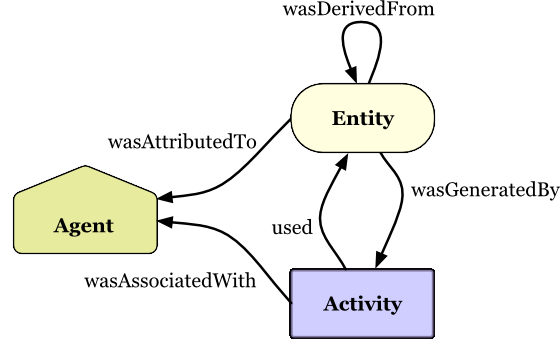

In [6]:
from IPython.display import display, Image
Image(filename='key-concepts.png')

In [20]:
# to do: look into some predefined vocabs, e.g. dublin core, iso19139,foaf  etc.

d1.add_namespace("enes_entity",'http://www.enes.org/enes_entitiy#')
d1.add_namespace('enes_agent','http://www.enes.org/enes_agent#')
d1.add_namespace('data_collection','http://www.enes.org/enes_entity/file_collection')
d1.add_namespace('data_manager','http://www.enes.org/enes_agent/data_manager')
d1.add_namespace('data_provider','http://www.enes.org/enes_agent/data_provider')
d1.add_namespace('subm','http://www.enes.org/enes_entity/data_submsission')
d1.add_namespace('foaf','http://xmlns.com/foaf/0.1/')

<Namespace: foaf {http://xmlns.com/foaf/0.1/}>

In [21]:
# later: organize things in budles
data_manager_ats = {'foaf:givenName':'Peter','foaf:mbox':'lenzen@dkzr.de'}

d1.entity('subm:empty')
def add_stage(agent,activity,in_state,out_state):
    # in_stage exists, out_stage is generated
    d1.agent(agent, data_manager_ats)
    d1.activity(activity)
    d1.entity(out_state)
   
    d1.wasGeneratedBy(out_state,activity)
    d1.used(activity,in_state)
    d1.wasAssociatedWith(activity,agent)
    d1.wasDerivedFrom(out_state,in_state)

In [22]:

add_stage(agent='data_provider:test_user_id',activity='subm:submit',in_state="subm:empty",out_state='subm:out1_sub')
add_stage(agent='data_manager:peter_lenzen_id',activity='subm:review',in_state="subm:out1_sub",out_state='subm:out1_rev')
add_stage(agent='data_provider:peter_lenzen_id',activity='subm:ingest',in_state="subm:out1_rev",out_state='subm:out1_ing')
add_stage(agent='data_provider:hdh_id',activity='subm:check',in_state="subm:out1_ing",out_state='subm:out1_che')
add_stage(agent='data_provider:katharina_b_id',activity='subm:publish',in_state="subm:out1_che",out_state='subm:out1_pub')
add_stage(agent='data_provider:lta_id',activity='subm:archive',in_state="subm:out1_pub",out_state='subm:out1_arch')

## assign information to provenance graph nodes and edges

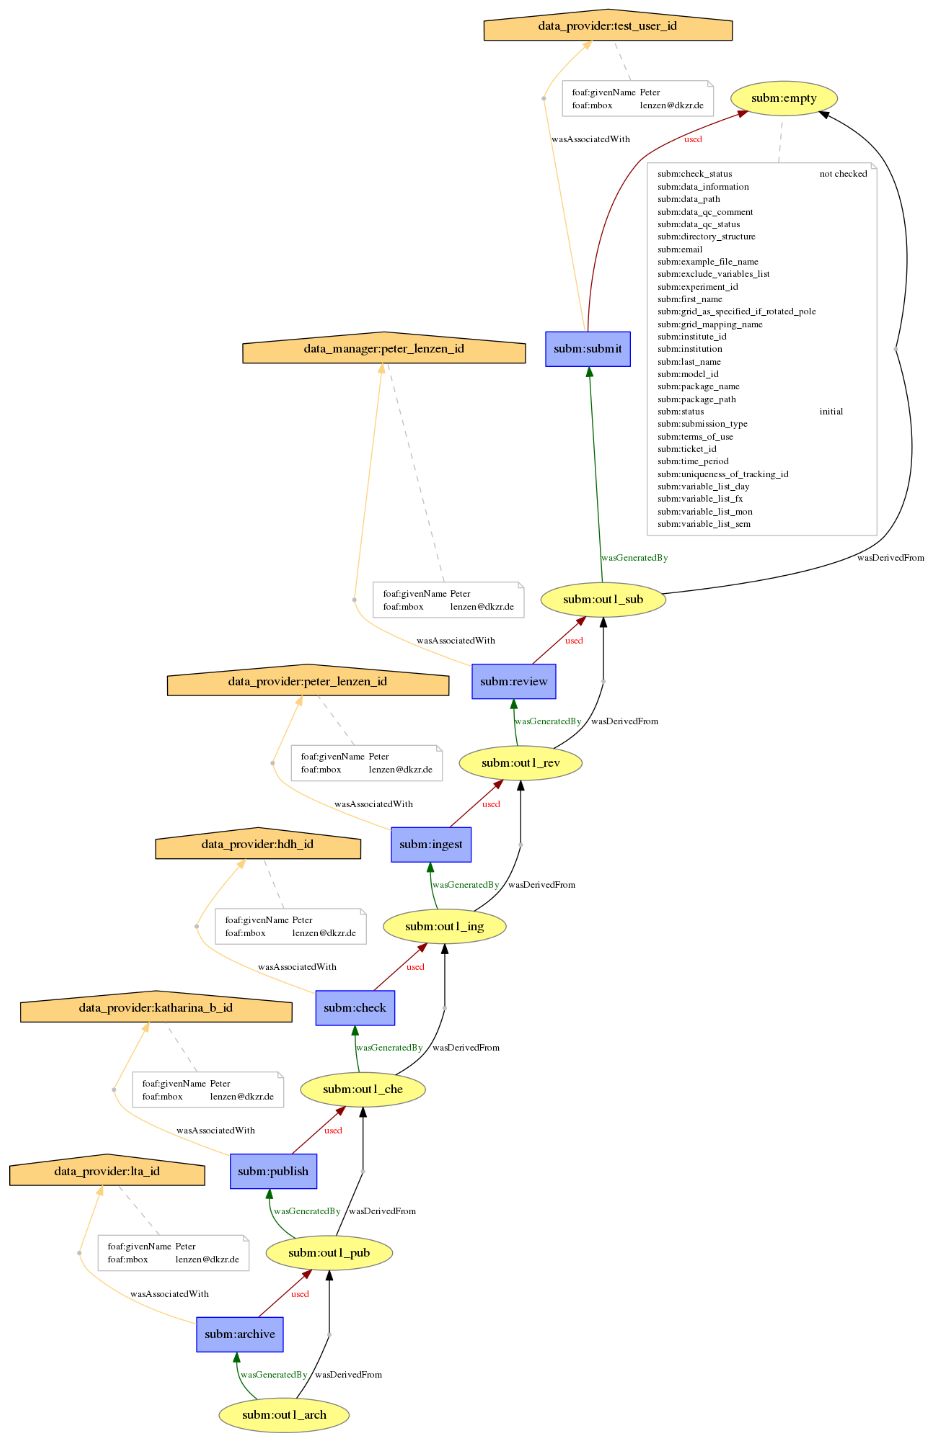

In [27]:
%matplotlib inline
d1.plot()



In [ ]:
d1.wasAttributedTo(data_submission,'????')

# Transform submission object to a provenance graph 

In [24]:
d1.get_records()
tst = d1.get_record('data_provider:lta_id')[0]
print tst

agent(data_provider:lta_id, [foaf:givenName="Peter", foaf:mbox="lenzen@dkzr.de"])


In [ ]:
print tst.attributes
#tst.formal_attributes
#tst.FORMAL_ATTRIBUTES
tst.add_attributes({'foaf:name':'tst'})
print tst.attributes
#for i in tst:
 #   print i
#tst.insert([('subm:givenName','sk')])

In [26]:
import sys
sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
from dkrz_forms import form_handler
sf,repo = form_handler.init_form("CORDEX")



init_dict = sf.__dict__ 
sub_form = form_handler.prefix(sf,'subm',sf.__dict__.keys())            

sub_dict = sub_form.__dict__

#init_state = d1.get_record('subm:empty')[0]
#init_state.add_attributes(init_dict)

sub_state = d1.get_record('subm:out1_sub')[0]
init_state.add_attributes(sub_dict)


Cordex submission form intitialized ......
(technically a submission form (sf) object as well as a repository (repo object) are created to store the submission form)


In [ ]:
tst_dict = {'test1':'val1','test2':'val2'}
tst = form_handler.submission_form(tst_dict) 
print tst.__dict__


In [ ]:
print result.__dict__

In [ ]:
dict_from_class(sf)